  Using cached azureml_sdk-1.52.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.52.0-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.52.0-py3-none-any.whl (2.3 kB)
  Using cached azureml_train_core-1.52.0-py3-none-any.whl (8.6 MB)
  Using cached azureml_sdk-1.51.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.51.0.post1-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.51.0-py3-none-any.whl (2.3 kB)
  Using cached azureml_train_core-1.51.0-py3-none-any.whl (8.6 MB)
  Using cached azureml_sdk-1.50.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.50.0-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.50.0-py3-none-any.whl (2.3 kB)
  Using cached azureml_train_core-1.50.0-py3-none-any.whl (8.6 MB)
  Using cached azureml_sdk-1.49.0-py3-none-any.whl (2.7 kB)
  Using cached azureml_core-1.49.0-py3-none-any.whl (3.3 MB)
  Using cached azureml_dataset_runtime-1.49.0-py3-none-any.whl (2.3 kB)
  Using cached azurem

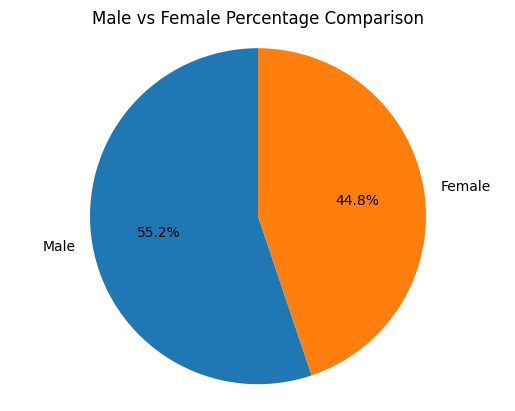

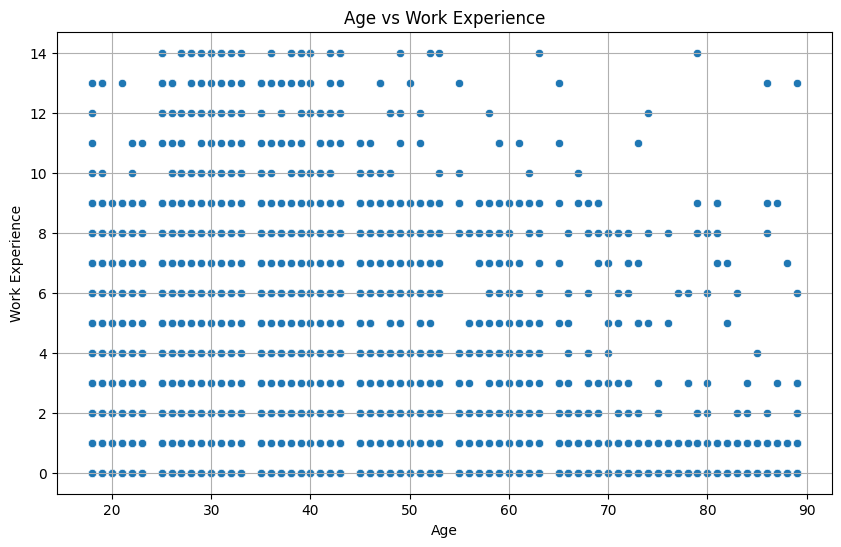

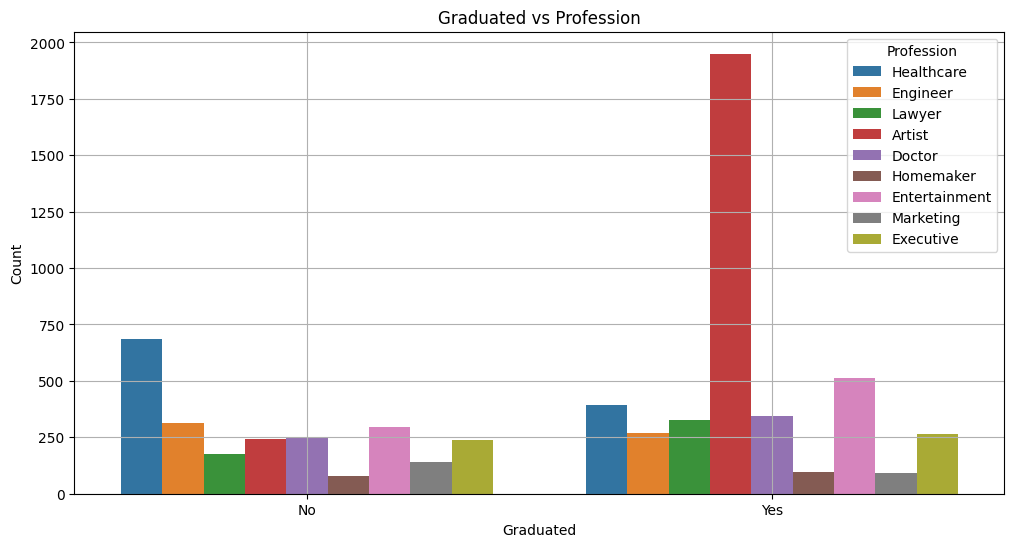

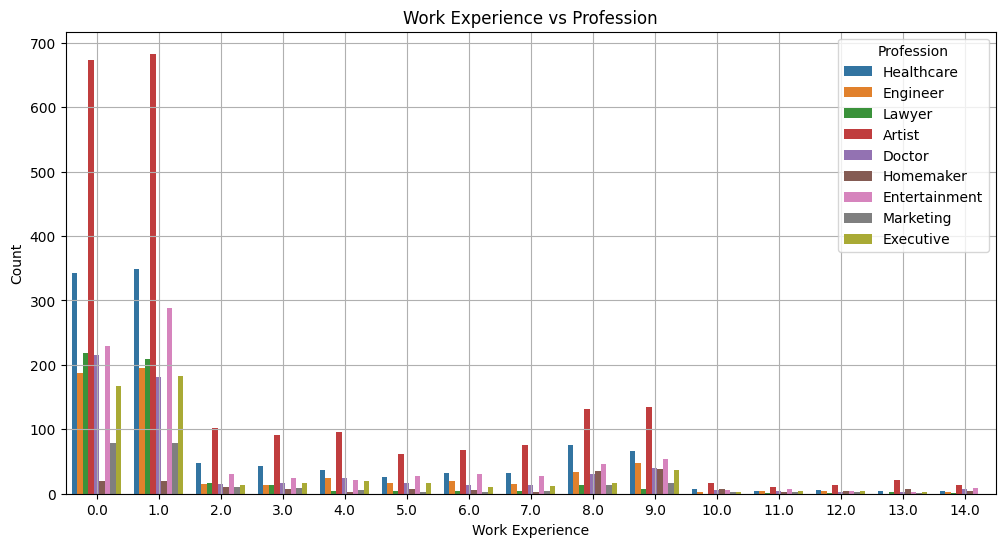

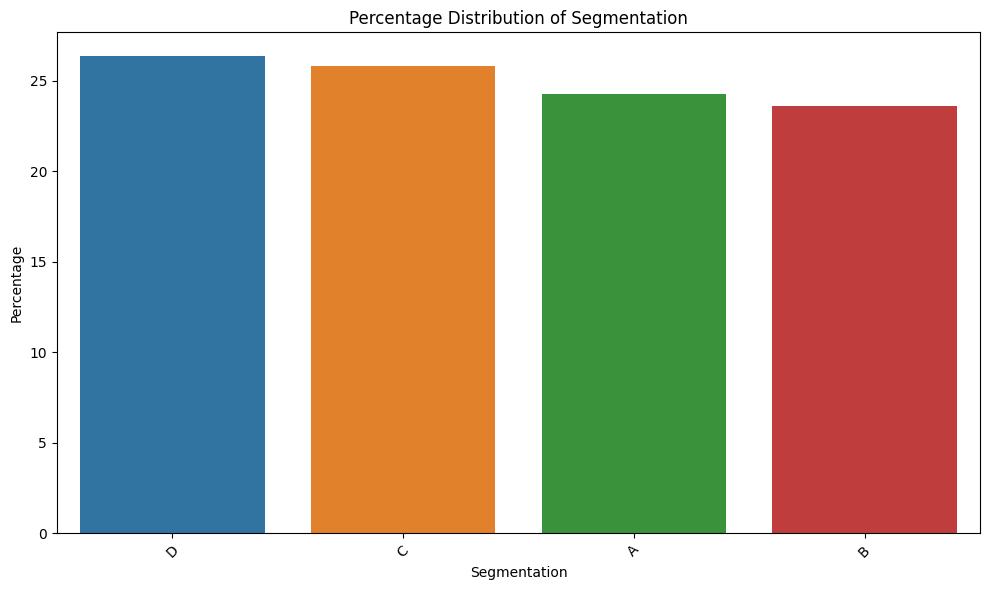

<Axes: xlabel='Segmentation', ylabel='count'>

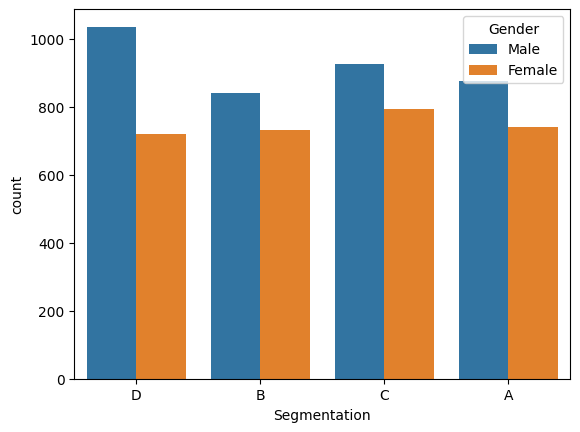

In [10]:
!pip3 install --upgrade azureml-sdk
!pip3 install openpyxl
!pip3 installl ipython
!pip3 install ipykernel
!pip3 install jupyter
!pip3 install  --upgrade nbformat
!pip3 install nbformat

!pip3 install plotly
import plotly.express as px


!pip3 install pandas
import pandas as pd

!pip3 install numpy
import numpy as np
import pip

!pip3 install pydotplus
import pydotplus
from sklearn import preprocessing

!pip3 install scikit-learn
import sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt


!pip3 install seaborn
import seaborn as sns


import pydotplus
from IPython.display import Image 


import pandas as pd 
market_segmentation = pd.read_csv('market_segmentation.csv')
market_segmentation.head()
market_segmentation.info()
market_segmentation.describe()

market_segmentation.dropna(inplace=True)


# Calculate the percentages for each gender
gender_counts = market_segmentation['Gender'].value_counts()
total_count = gender_counts.sum()
male_percentage = (gender_counts['Male'] / total_count) * 100
female_percentage = (gender_counts['Female'] / total_count) * 100

# Create a pie chart
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['#1f77b4', '#ff7f0e']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Set the plot title
plt.title('Male vs Female Percentage Comparison')

# Display the chart
plt.show()

# Select 'Age' and 'Work_experience' columns
age_work_data = market_segmentation[['Age', 'Work_Experience']]

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Work_Experience', data=age_work_data)
plt.title('Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.grid(True)
plt.show()

# Select 'Graduated' and 'Profession' columns
graduated_profession_data = market_segmentation[['Graduated', 'Profession']]

# Create a count plot using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='Graduated', hue='Profession', data=graduated_profession_data)
plt.title('Graduated vs Profession')
plt.xlabel('Graduated')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Select 'Work_experience' and 'Profession' columns
work_experience_profession_data = market_segmentation[['Work_Experience', 'Profession']]

# Create a count plot using seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='Work_Experience', hue='Profession', data=work_experience_profession_data)
plt.title('Work Experience vs Profession')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Calculate percentage distribution
percentage_dist = (market_segmentation['Segmentation'].value_counts() / len(market_segmentation)) * 100

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage_dist.index, y=percentage_dist.values)
plt.title('Percentage Distribution of Segmentation')
plt.xlabel('Segmentation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Create a pie chart using Plotly Express
fig = px.pie(percentage_dist, values=percentage_dist.values, names=percentage_dist.index,
             title='Percentage Distribution of Segmentation')
fig.show()

sns.countplot(market_segmentation,x='Segmentation',hue='Gender')

# Part 2 - Training and Evaluation


# Convert categorical variables to numerical variables
for column in market_segmentation.columns:
    if market_segmentation[column].dtype == 'object':
        encoder = LabelEncoder()
        market_segmentation[column] = encoder.fit_transform(market_segmentation[column])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(market_segmentation.drop('Segmentation', axis=1), market_segmentation['Segmentation'], test_size=0.2)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

# Create a correlation matrix
correlation_matrix = market_segmentation.corr()

# Print the correlation matrix
print(correlation_matrix)

# Display the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

